In [1]:
import numpy as np
import pandas as pd

In [6]:


df = pd.read_csv('cardio_train.csv')

In [10]:
df

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,110,80,1,1,0,0,1,0,21.967120
1,55,1,140,90,3,1,0,0,1,1,34.927679
2,51,1,130,70,3,1,0,0,0,1,23.507805
3,48,2,150,100,1,1,0,0,1,1,28.710479
4,47,1,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,120,80,1,1,1,0,1,0,26.927438
69996,61,1,140,90,2,2,0,0,1,1,50.472681
69997,52,2,180,90,3,1,0,1,0,1,31.353579
69998,61,1,135,80,1,2,0,0,0,1,27.099251


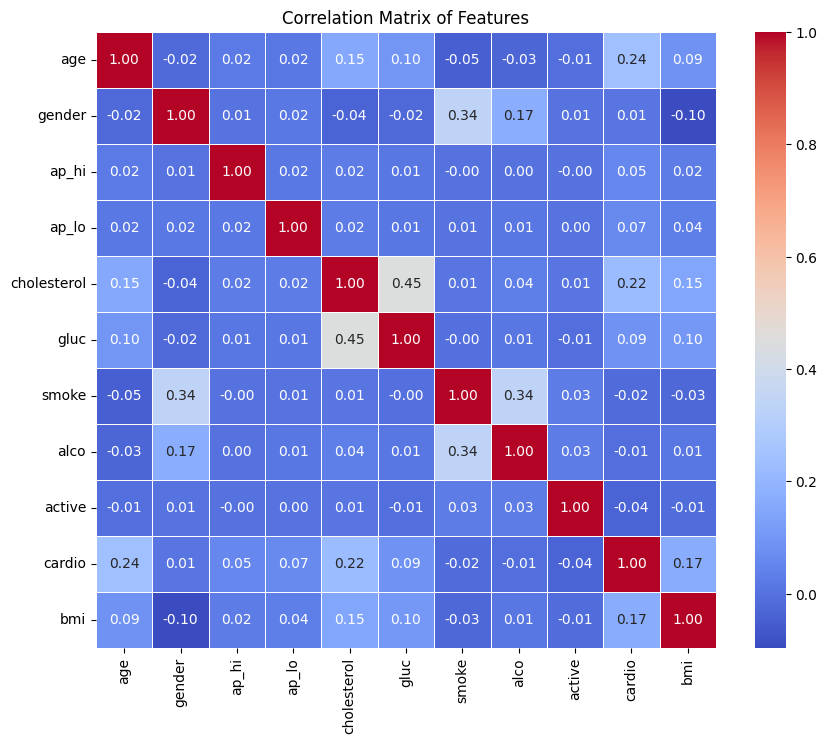

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


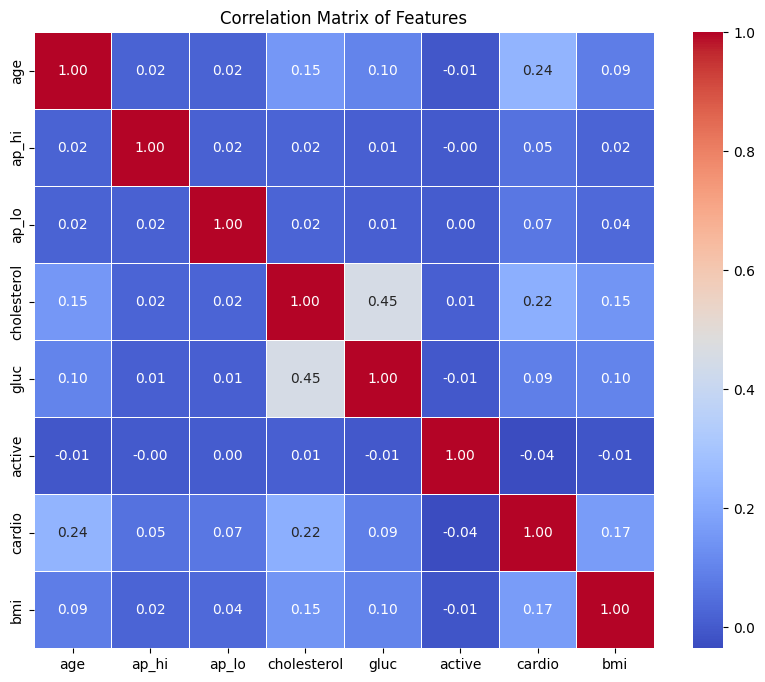

Logistic Regression: 0.7136
Decision Tree: 0.6453
Random Forest: 0.6808
Gradient Boosting: 0.7325
SVM: 0.6508
k-NN: 0.6862
Neural Network: 0.7160


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "cardio_train.csv"
df = pd.read_csv(file_path, delimiter=';')

# Drop unnecessary columns
df.drop(columns=['id', 'alco', 'gender', 'smoke'], inplace=True)

# Create BMI column
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

# Convert age to years
df['age'] = df['age'] // 365

# Drop 'height' and 'weight' as they're replaced by BMI
df.drop(columns=['height', 'weight'], inplace=True)

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

# Split dataset into features and target
X = df.drop(columns=['cardio'])
y = df['cardio']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize relevant numeric features
scaler = StandardScaler()
X_train[['bmi', 'ap_hi', 'ap_lo']] = scaler.fit_transform(X_train[['bmi', 'ap_hi', 'ap_lo']])
X_test[['bmi', 'ap_hi', 'ap_lo']] = scaler.transform(X_test[['bmi', 'ap_hi', 'ap_lo']])

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=500)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print accuracy results
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")


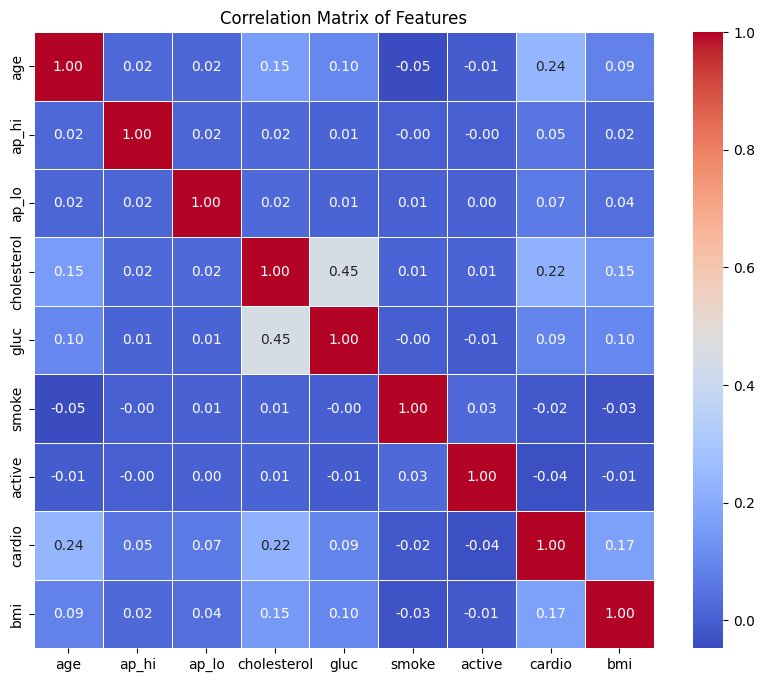

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:08:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression: 0.7141
Decision Tree: 0.6417
Random Forest: 0.6834
Gradient Boosting: 0.7344
XGBoost: 0.7296
SVM: 0.6506
k-NN: 0.6794
Neural Network: 0.7266


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "cardio_train.csv"
df = pd.read_csv(file_path, delimiter=';')

# Drop unnecessary columns (keep smoke)
df.drop(columns=['id', 'alco', 'gender'], inplace=True)

# Create BMI column
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

# Convert age to years
df['age'] = df['age'] // 365

# Drop 'height' and 'weight' as they're replaced by BMI
df.drop(columns=['height', 'weight'], inplace=True)

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

# Split dataset into features and target
X = df.drop(columns=['cardio'])
y = df['cardio']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize relevant numeric features
scaler = StandardScaler()
X_train[['bmi', 'ap_hi', 'ap_lo']] = scaler.fit_transform(X_train[['bmi', 'ap_hi', 'ap_lo']])
X_test[['bmi', 'ap_hi', 'ap_lo']] = scaler.transform(X_test[['bmi', 'ap_hi', 'ap_lo']])

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=500)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print accuracy results
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

results = {}
false_negatives = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Store accuracy and false negatives
    results[name] = accuracy_score(y_test, y_pred)
    false_negatives[name] = fn

# Print accuracy results
print("\nModel Performance:")
for model, accuracy in results.items():
    print(f"{model}: Accuracy = {accuracy:.4f}, False Negatives = {false_negatives[model]}")

# Find the model with the least false negatives
best_model = min(false_negatives, key=false_negatives.get)
print(f"\nThe model with the **least false negatives** is: **{best_model}** with {false_negatives[best_model]} false negatives.")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:34:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Performance:
Logistic Regression: Accuracy = 0.7141, False Negatives = 2293
Decision Tree: Accuracy = 0.6424, False Negatives = 2604
Random Forest: Accuracy = 0.6844, False Negatives = 2165
Gradient Boosting: Accuracy = 0.7344, False Negatives = 2064
XGBoost: Accuracy = 0.7296, False Negatives = 2138
SVM: Accuracy = 0.6506, False Negatives = 2955
k-NN: Accuracy = 0.6794, False Negatives = 2296
Neural Network: Accuracy = 0.7263, False Negatives = 2446

The model with the **least false negatives** is: **Gradient Boosting** with 2064 false negatives.


In [17]:
# Compute False Negative Rate (FN%) for each model
fn_percentages = {}
for name in false_negatives:
    tn, fp, fn, tp = confusion_matrix(y_test, models[name].predict(X_test)).ravel()
    fn_percentages[name] = (fn / (fn + tp)) * 100  # FN% formula

# Print FN% along with accuracy and FN count
print("\nModel Performance:")
for model in results:
    print(f"{model}: Accuracy = {results[model]:.4f}, False Negatives = {false_negatives[model]}, FN% = {fn_percentages[model]:.2f}%")

# Find the model with the least false negatives
best_model = min(false_negatives, key=false_negatives.get)
print(f"\nThe model with the **least false negatives** is: **{best_model}** with {false_negatives[best_model]} false negatives ({fn_percentages[best_model]:.2f}%).")



Model Performance:
Logistic Regression: Accuracy = 0.7141, False Negatives = 2293, FN% = 32.78%
Decision Tree: Accuracy = 0.6424, False Negatives = 2604, FN% = 37.22%
Random Forest: Accuracy = 0.6844, False Negatives = 2165, FN% = 30.95%
Gradient Boosting: Accuracy = 0.7344, False Negatives = 2064, FN% = 29.50%
XGBoost: Accuracy = 0.7296, False Negatives = 2138, FN% = 30.56%
SVM: Accuracy = 0.6506, False Negatives = 2955, FN% = 42.24%
k-NN: Accuracy = 0.6794, False Negatives = 2296, FN% = 32.82%
Neural Network: Accuracy = 0.7263, False Negatives = 2446, FN% = 34.96%

The model with the **least false negatives** is: **Gradient Boosting** with 2064 false negatives (29.50%).


In [18]:
from sklearn.metrics import precision_recall_curve

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Example model
model.fit(X_train, y_train)

# Get prediction probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Choose a lower threshold (e.g., 0.4 instead of 0.5)
threshold = 0.4
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Compute new confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_adjusted).ravel()

# Compute FN%
fn_rate = (fn / (fn + tp)) * 100
print(f"False Negative Rate at threshold {threshold}: {fn_rate:.2f}%")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:41:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


False Negative Rate at threshold 0.4: 21.78%


In [20]:
model = XGBClassifier(scale_pos_weight=2, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Compute False Negative Rate (FN%)
fn_rate = (fn / (fn + tp)) * 100  # FN% = FN / (FN + TP) * 100

# Print the results
print(f"False Negatives: {fn}")
print(f"False Negative Rate: {fn_rate:.2f}%")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:42:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


False Negatives: 1112
False Negative Rate: 15.89%


In [21]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('gb', GradientBoostingClassifier())
], voting='soft')

ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [22]:
from sklearn.metrics import confusion_matrix

# Get predictions from the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ensemble).ravel()

# Compute False Negative Rate (FN%)
fn_rate = (fn / (fn + tp)) * 100  # FN% formula

# Print the results
print(f"False Negatives: {fn}")
print(f"False Negative Rate: {fn_rate:.2f}%")


False Negatives: 2089
False Negative Rate: 29.86%


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Use recall as the scoring metric
model = GradientBoostingClassifier()
grid = GridSearchCV(model, param_grid, scoring='recall', cv=5)
grid.fit(X_train, y_train)

# Get best model and adjust threshold
best_model = grid.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]
threshold = 0.3  # Optimize using precision_recall_curve
y_pred = (y_proba >= threshold).astype(int)

# Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"Optimized False Negatives: {fn}")

Optimized False Negatives: 889


In [24]:
# Assuming you ran GridSearchCV as in the previous example
best_params = grid.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [25]:
# Predict with default threshold (0.5)
y_pred_default = grid.best_estimator_.predict(X_test)

# Compute metrics
accuracy_default = accuracy_score(y_test, y_pred_default)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_default).ravel()

print(f"Accuracy (Default Threshold): {accuracy_default:.4f}")
print(f"False Negatives (Default Threshold): {fn}")

Accuracy (Default Threshold): 0.7346
False Negatives (Default Threshold): 2060


In [26]:
# Predict probabilities and adjust threshold
y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]
threshold = 0.3  # Adjust based on your precision-recall curve analysis
y_pred_custom = (y_proba >= threshold).astype(int)

# Compute metrics
accuracy_custom = accuracy_score(y_test, y_pred_custom)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_custom).ravel()

print(f"Accuracy (Threshold=0.3): {accuracy_custom:.4f}")
print(f"False Negatives (Threshold=0.3): {fn}")

Accuracy (Threshold=0.3): 0.6840
False Negatives (Threshold=0.3): 889


In [27]:
from sklearn.metrics import classification_report

print("\nClassification Report (Threshold=0.3):")
print(classification_report(y_test, y_pred_custom))


Classification Report (Threshold=0.3):
              precision    recall  f1-score   support

           0       0.80      0.50      0.61      7004
           1       0.63      0.87      0.73      6996

    accuracy                           0.68     14000
   macro avg       0.71      0.68      0.67     14000
weighted avg       0.71      0.68      0.67     14000



In [31]:
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix

# Retrieve best model and parameters
best_model = grid.best_estimator_
best_params = grid.best_params_

# Evaluate with default threshold
y_pred_default = best_model.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
fn_default = confusion_matrix(y_test, y_pred_default).ravel()[2]

# Evaluate with adjusted threshold
y_proba = best_model.predict_proba(X_test)[:, 1]
threshold = 0.3  # Set your optimized threshold here
y_pred_custom = (y_proba >= threshold).astype(int)
accuracy_custom = accuracy_score(y_test, y_pred_custom)
fn_custom = confusion_matrix(y_test, y_pred_custom).ravel()[2]

# Print results
print(f"Best Parameters: {best_params}\n")
print(f"Default Threshold (0.5): Accuracy = {accuracy_default:.4f}, False Negatives = {fn_default}")
print(f"Adjusted Threshold ({threshold}): Accuracy = {accuracy_custom:.4f}, False Negatives = {fn_custom}")

# Save the best model
model_filename = "best_model.pkl"
joblib.dump(best_model, model_filename)
print(f"Model saved to {model_filename}")

# Load the model
loaded_model = joblib.load(model_filename)
print("Model loaded successfully!")

# Verify the loaded model
y_pred_loaded = loaded_model.predict(X_test)
if np.array_equal(y_pred_default, y_pred_loaded):
    print("Loaded model predictions match the original model!")
else:
    print("Loaded model predictions DO NOT match the original model!")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Default Threshold (0.5): Accuracy = 0.7346, False Negatives = 2060
Adjusted Threshold (0.3): Accuracy = 0.6840, False Negatives = 889
Model saved to best_model.pkl
Model loaded successfully!
Loaded model predictions match the original model!


In [29]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate False Negative Rate (FNR)
fn_rate = fn / (fn + tp)

# Display as percentage
print(f"False Negative Rate (FNR): {fn_rate * 100:.2f}%")

False Negative Rate (FNR): 12.71%
